# Import Data Walmart

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load the dataset
walmart_data = pd.read_excel('walmart Retail Data 1.xlsx')

In [3]:
# convert Order Date column to datetime
walmart_data['Order Date'] = pd.to_datetime(walmart_data['Order Date'])

# create new columns for year and month
walmart_data['Year'] = walmart_data['Order Date'].dt.year
walmart_data['Month'] = walmart_data['Order Date'].dt.month

# fill missing values in Customer Age column with the median age
walmart_data['Customer Age'].fillna(walmart_data['Customer Age'].median(), inplace=True)

# fill missing values in Product Base Margin column with the median margin
walmart_data['Product Base Margin'].fillna(walmart_data['Product Base Margin'].median(), inplace=True)

# convert Discount column to decimal format
#walmart_data['Discount'] = walmart_data['Discount'].apply(lambda x: x/100)

# create a new column for total cost
walmart_data['Total Cost'] = walmart_data['Sales'] * (1 - walmart_data['Discount']) - walmart_data['Profit']

# create a new column for profit margin
walmart_data['Profit Margin'] = walmart_data['Profit'] / walmart_data['Sales']

# convert Order Date and Ship Date columns to datetime data type
walmart_data['Order Date'] = pd.to_datetime(walmart_data['Order Date'])
walmart_data['Ship Date'] = pd.to_datetime(walmart_data['Ship Date'])

# convert Discount, Profit, Sales, Shipping Cost, Unit Price and Product Base Margin columns to float data type
walmart_data['Discount'] = walmart_data['Discount'].astype(float)
walmart_data['Profit'] = walmart_data['Profit'].astype(float)
walmart_data['Sales'] = walmart_data['Sales'].astype(float)
walmart_data['Shipping Cost'] = walmart_data['Shipping Cost'].astype(float)
walmart_data['Unit Price'] = walmart_data['Unit Price'].astype(float)
walmart_data['Product Base Margin'] = walmart_data['Product Base Margin'].astype(float)

# convert Customer Age, Number of Records, Order ID, Order Quantity, Row ID, and Zip Code columns to integer data type
walmart_data['Customer Age'] = walmart_data['Customer Age'].astype(int)
walmart_data['Number of Records'] = walmart_data['Number of Records'].astype(int)
walmart_data['Order ID'] = walmart_data['Order ID'].astype(int)
walmart_data['Order Quantity'] = walmart_data['Order Quantity'].astype(int)
walmart_data['Row ID'] = walmart_data['Row ID'].astype(int)
walmart_data['Zip Code'] = walmart_data['Zip Code'].astype(int)

# store the cleaned data in a new dataframe
clean_df_walmart = walmart_data
clean_df_walmart

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code,Year,Month,Total Cost,Profit Margin
0,McKeesport,55,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131,2012,1,274.1240,-0.619871
1,Bowie,55,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,2012-01-03,Express Air,35.00,Maryland,95.99,20715,2012,1,1145.5916,-0.393029
2,Napa,55,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,2012-01-02,Delivery Truck,48.80,California,291.73,94559,2012,1,1432.1400,-0.155828
3,Montebello,55,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,2012-01-02,Regular Air,1.97,California,15.04,90640,2012,1,317.8260,0.403042
4,Napa,55,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,2012-01-04,Delivery Truck,45.00,California,100.98,94559,2012,1,4847.2167,-0.257115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Fairfield,95,Tony Molinari,Corporate,0.10,1,2015-12-30,50950,Not Specified,35,...,2015-12-30,Express Air,4.51,California,13.48,94533,2015,12,418.3600,-0.033631
8395,Harker Heights,95,Matt Hagelstein,Home Office,0.09,1,2015-12-30,25542,Low,37,...,2015-12-30,Express Air,4.23,Texas,7.28,76543,2015,12,252.9486,-0.072477
8396,Riverview,95,Theresa Swint,Consumer,0.10,1,2015-12-30,45127,Medium,10,...,2015-12-30,Regular Air,0.70,Florida,1.48,33569,2015,12,14.0250,-0.091166
8397,Nicholasville,95,Maribeth Yedwab,Home Office,0.09,1,2015-12-30,49344,Low,1,...,2015-12-30,Regular Air,24.49,Kentucky,832.81,40356,2015,12,1476.2303,-0.927639


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns

In [5]:
# Convert categorical variables to numerical labels
cat_cols = ['City', 'Customer Segment', 'Order Priority',
            'Product Category', 'Product Sub-Category', 'Product Container',
            'Region', 'Ship Mode', 'State']

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    clean_df_walmart[col+'_label'] = le.fit_transform(clean_df_walmart[col])
    label_encoders[col] = le


In [6]:
clean_df_walmart

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit Margin,City_label,Customer Segment_label,Order Priority_label,Product Category_label,Product Sub-Category_label,Product Container_label,Region_label,Ship Mode_label,State_label
0,McKeesport,55,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-0.619871,749,3,1,1,14,4,1,2,35
1,Bowie,55,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-0.393029,122,2,4,1,14,2,1,1,19
2,Napa,55,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-0.155828,826,1,2,0,3,1,3,0,3
3,Montebello,55,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,0.403042,798,0,0,1,10,6,3,2,3
4,Napa,55,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-0.257115,826,1,2,0,3,1,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Fairfield,95,Tony Molinari,Corporate,0.10,1,2015-12-30,50950,Not Specified,35,...,-0.033631,386,1,4,1,14,4,3,1,3
8395,Harker Heights,95,Matt Hagelstein,Home Office,0.09,1,2015-12-30,25542,Low,37,...,-0.072477,507,2,2,1,10,6,0,1,40
8396,Riverview,95,Theresa Swint,Consumer,0.10,1,2015-12-30,45127,Medium,10,...,-0.091166,1067,0,3,1,12,6,2,2,7
8397,Nicholasville,95,Maribeth Yedwab,Home Office,0.09,1,2015-12-30,49344,Low,1,...,-0.927639,857,2,2,1,13,3,2,2,14


In [7]:
from sklearn.model_selection import train_test_split

# Splitting the data into train (70%), validation (15%), and test (15%) sets
train_data, temp_test_data = train_test_split(clean_df_walmart, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_test_data, test_size=0.5, random_state=42)


In [8]:
# Selecting the columns relevant to sales
cols = ['Product Sub-Category_label', 'Profit', 'Total Cost', 'Shipping Cost',
               'Customer Segment_label','Order Priority_label','Product Category_label',
                'Product Sub-Category_label','Product Container_label',
                'Product Base Margin','Order Quantity', 'Unit Price','Discount',
                'Total Cost', 'Shipping Cost', 'Region_label', 'Ship Mode_label', 'State_label']

# Creating feature matrix and target vector for train set
X_train = train_data[cols]
y_train = train_data['Sales']

# Creating feature matrix and target vector for validation set
X_val = val_data[cols]
y_val = val_data['Sales']

# Creating feature matrix and target vector for test set
X_test = test_data[cols]
y_test = test_data['Sales']

In [9]:
from sklearn.linear_model import LinearRegression

# Creating a multiple linear regression model
mlr = LinearRegression()

# Fitting the model to the training data
mlr.fit(X_train, y_train)


LinearRegression()

In [10]:
from sklearn import metrics

# Predicting the sales using the test data set
y_pred = mlr.predict(X_test)

# Calculating the R-squared value
r2 = metrics.r2_score(y_test, y_pred)
print('R-squared value:', r2)

# Calculating the mean squared error
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# Calculating the mean absolute error
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean absolute error:', mae)

# Calculating the root mean squared error
rmse = metrics.mean_squared_error(y_test, y_pred, squared = False)
print('Root mean squared error:', rmse)

R-squared value: 0.9987275489384038
Mean squared error: 14726.944693608772
Mean absolute error: 59.21762059394641
Root mean squared error: 121.35462370098953


In [40]:
y_pred

array([1483.02960925,  101.29109079,  306.18368312, ..., 1308.35614171,
        219.28716942,  257.69370212])

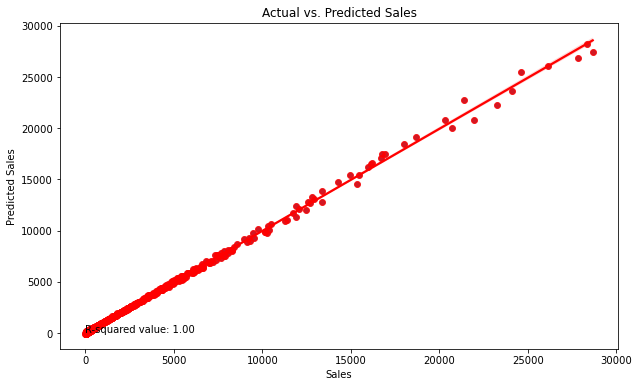

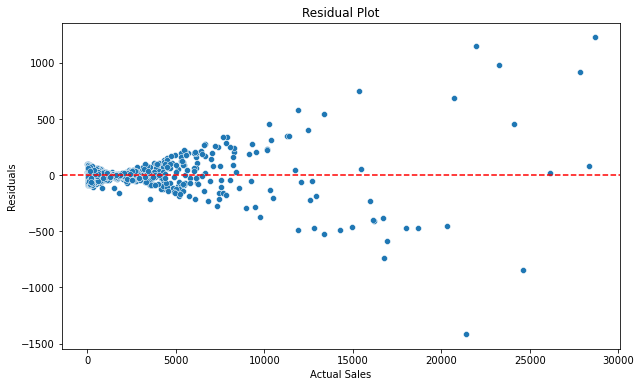

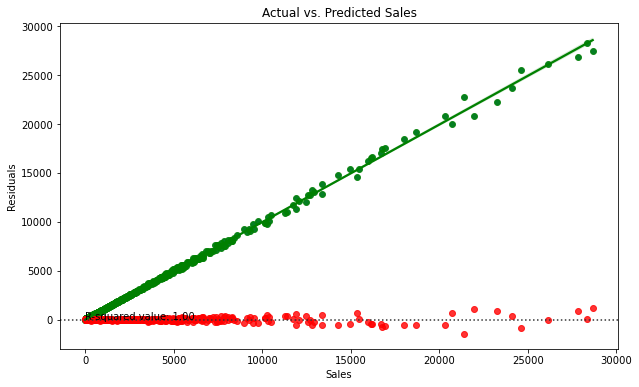

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a scatter plot of predicted vs. actual sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')

# Adding a regression line for reference
sns.regplot(x=y_test, y=y_pred, color='r')
plt.text(2, 18, f'R-squared value: {r2:.2f}')
plt.show()

# Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# Creating a scatter plot of predicted vs. actual sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')

# Adding a regression line for reference
sns.regplot(x=y_test, y=y_pred, color='green')

# Showing the R-squared value on the plot
plt.text(5, 25, f'R-squared value: {r2:.2f}')

# Calculating and plotting the residuals
residuals = y_test - y_pred
sns.residplot(x=y_test, y=residuals, color='red')
plt.ylabel('Residuals')

plt.show()

In [13]:
# Select relevant columns for clustering
cluster_cols = ['Product Sub-Category_label', 'Sales', 'Profit', 'Total Cost', 'Shipping Cost',
               'Customer Segment_label','Order Priority_label','Product Category_label',
                'Product Sub-Category_label','Product Container_label',
                'Product Base Margin','Order Quantity', 'Unit Price','Discount',
                'Total Cost', 'Shipping Cost', 'Region_label', 'Ship Mode_label', 'State_label']

# Gives K-Means Silhouette Score: 0.5456500119474921

In [14]:
cluster_cols = ['Sales']

#  Product Base Margin - Agglomerative Hierarchical Silhouette Score: 0.70

In [15]:
# Split the data into train, test, validation sets
train_df, test_df = train_test_split(clean_df_walmart, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

In [16]:
# K-Means clustering
kmeans = KMeans(n_clusters=len(clean_df_walmart['Product Category'].unique()), random_state=42).fit(train_df[cluster_cols])
train_df['kmeans_cluster'] = kmeans.predict(train_df[cluster_cols])
val_df['kmeans_cluster'] = kmeans.predict(val_df[cluster_cols])
test_df['kmeans_cluster'] = kmeans.predict(test_df[cluster_cols])

# Agglomerative hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=len(clean_df_walmart['Product Category'].unique())).fit(train_df[cluster_cols])
train_df['agg_cluster'] = agg_clustering.fit_predict(train_df[cluster_cols])
val_df['agg_cluster'] = agg_clustering.fit_predict(val_df[cluster_cols])
test_df['agg_cluster'] = agg_clustering.fit_predict(test_df[cluster_cols])

# Calculate silhouette scores for both models on validation data
kmeans_silhouette = silhouette_score(val_df[cluster_cols], val_df['kmeans_cluster'])
agg_silhouette = silhouette_score(val_df[cluster_cols], val_df['agg_cluster'])
print('K-Means Silhouette Score:', kmeans_silhouette)
print('Agglomerative Hierarchical Silhouette Score:', agg_silhouette)

K-Means Silhouette Score: 0.7789622353908033
Agglomerative Hierarchical Silhouette Score: 0.7620941297363198


In [17]:
label_encoders = dict()
# Iterate over unique label encoder values for Product Sub-Category
for label in clean_df_walmart['Product Category_label'].unique():
    # Get the corresponding Product Category value for this label encoder value
    category = clean_df_walmart.loc[clean_df_walmart['Product Category_label'] == label, 'Product Category'].iloc[0]
    # Add the key-value pair to the dictionary
    label_encoders[label] = category
label_encoders

{1: 'Office Supplies', 0: 'Furniture', 2: 'Technology'}

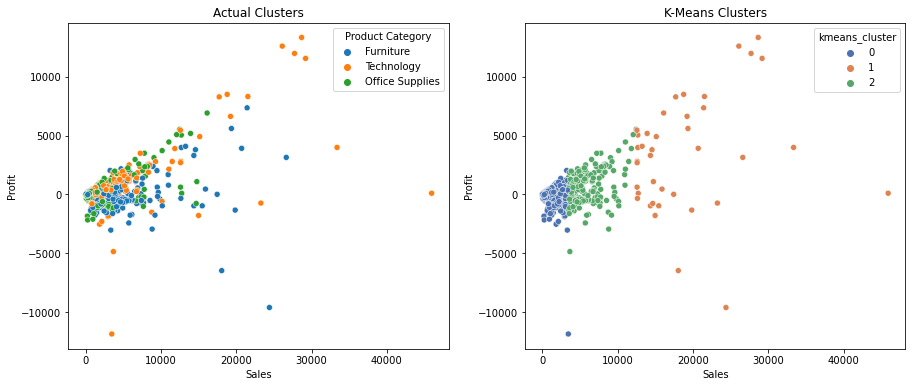

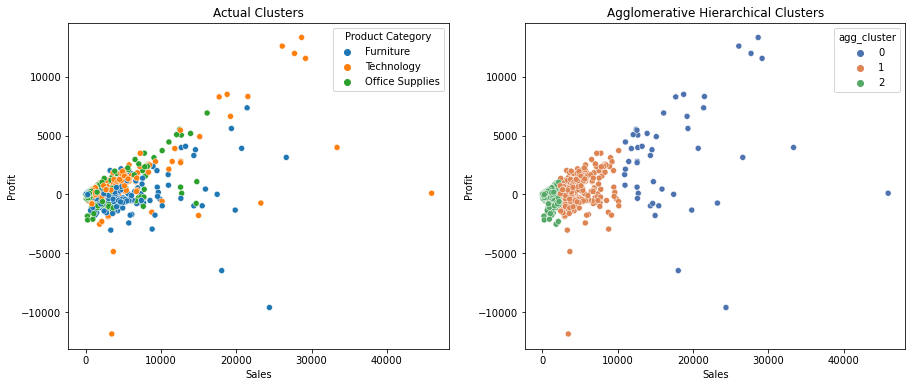

In [18]:
# Plot the clusters
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Sales', y='Profit', hue='Product Category', data=val_df)
plt.title('Actual Clusters')

plt.subplot(1,2,2)
sns.scatterplot(x='Sales', y='Profit', hue='kmeans_cluster', data=val_df, palette='deep')
plt.title('K-Means Clusters')
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Sales', y='Profit', hue='Product Category', data=val_df)
plt.title('Actual Clusters')

plt.subplot(1,2,2)
sns.scatterplot(x='Sales', y='Profit', hue='agg_cluster', data=val_df, palette='deep')
plt.title('Agglomerative Hierarchical Clusters')
plt.show()

In [19]:
#clean_df_walmart.head().to_csv('out.csv')

### Random forest model for predicting sales

In [20]:
print(X_train.shape, X_test.shape)

(5879, 18) (1260, 18)


In [21]:
int(X_train.shape[1]/3)

6

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_features = int(X_train.shape[1]/3), random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features=6, random_state=42)

In [23]:
# Predicting the sales using the test data set
rf_pred = rf_model.predict(X_test)

# Calculating the R-squared value
rf_r2 = metrics.r2_score(y_test, rf_pred)
print('R-squared value:', rf_r2)

# Calculating the mean squared error
rf_mse = metrics.mean_squared_error(y_test, rf_pred)
print('Mean squared error:', rf_mse)

# Calculating the mean absolute error
rf_mae = metrics.mean_absolute_error(y_test, rf_pred)
print('Mean absolute error:', rf_mae)

# Calculating the root mean squared error
rf_rmse = metrics.mean_squared_error(y_test, rf_pred, squared = False)
print('Root mean squared error:', rf_rmse)

R-squared value: 0.9899304552811798
Mean squared error: 116541.71436491336
Mean absolute error: 89.8600575079365
Root mean squared error: 341.3820650897076


#### Tuning Random Forest model

In [24]:
param_grid = {
'n_estimators': [10, 40, 70, 100, 150],
'max_features': ['sqrt', 'log2', int(X_train.shape[1]/3), None],
'max_depth': [3, 6, 9],
'max_leaf_nodes': [3, 6, 9]
}

In [25]:
from sklearn.model_selection import GridSearchCV

rf_grid_search = GridSearchCV(RandomForestRegressor(), param_grid = param_grid, cv = 5, n_jobs = -1)
rf_grid_search.fit(X_train, y_train)
print(rf_grid_search.best_estimator_)

RandomForestRegressor(max_depth=6, max_features=None, max_leaf_nodes=9,
                      n_estimators=150)


#### Updating RandomForest model parameters with best fit parameters

In [26]:
rf_best_fit = RandomForestRegressor(max_features = None, n_estimators = 70, max_leaf_nodes = 9, max_depth = 6, n_jobs = -1, random_state = 42)
rf_best_fit.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features=None, max_leaf_nodes=9,
                      n_estimators=70, n_jobs=-1, random_state=42)

In [27]:
# Predicting the sales using the test data set
rf_best_pred = rf_best_fit.predict(X_test)

# Calculating the R-squared value
rf_best_r2 = metrics.r2_score(y_test, rf_best_pred)
print('R-squared value:', rf_best_r2)

# Calculating the mean squared error
rf_best_mse = metrics.mean_squared_error(y_test, rf_best_pred)
print('Mean squared error:', rf_best_mse)

# Calculating the mean absolute error
rf_best_mae = metrics.mean_absolute_error(y_test, rf_best_pred)
print('Mean absolute error:', rf_best_mae)

# Calculating the root mean squared error
rf_best_rmse = metrics.mean_squared_error(y_test, rf_best_pred, squared = False)
print('Root mean squared error:', rf_best_rmse)

R-squared value: 0.9390272118088329
Mean squared error: 705679.6969307247
Mean absolute error: 420.5258568911395
Root mean squared error: 840.0474373097776


### Regression tree

In [28]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state = 42)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [29]:
# Predicting the sales using the test data set
reg_tree_pred = reg_tree.predict(X_test)

# Calculating the R-squared value
reg_tree_r2 = metrics.r2_score(y_test, reg_tree_pred)
print('R-squared value:', reg_tree_r2)

# Calculating the mean squared error
reg_tree_mse = metrics.mean_squared_error(y_test, rf_best_pred)
print('Mean squared error:', reg_tree_mse)

# Calculating the mean absolute error
reg_tree_mae = metrics.mean_absolute_error(y_test, reg_tree_pred)
print('Mean absolute error:', reg_tree_mae)

# Calculating the root mean squared error
reg_tree_rmse = metrics.mean_squared_error(y_test, reg_tree_pred, squared = False)
print('Root mean squared error:', reg_tree_rmse)

R-squared value: 0.9770942254975734
Mean squared error: 705679.6969307247
Mean absolute error: 117.2096634920635
Root mean squared error: 514.8826696307835


## Business Questions

### Average number of orders by Zipcode

In [30]:
clean_df_walmart['Order ID'] = clean_df_walmart['Order ID'].apply(str)

In [31]:
clean_df_walmart['Order ID']

0       28774
1       13729
2       37537
3       44069
4       37537
        ...  
8394    50950
8395    25542
8396    45127
8397    49344
8398    49344
Name: Order ID, Length: 8399, dtype: object

In [32]:
clean_df_walmart.groupby('Zip Code')['Order ID'].count().sort_values(ascending = False).head(10)

Zip Code
92277    22
94110    22
88201    21
81301    20
59715    19
55372    19
87105    18
4401     17
46203    17
83701    15
Name: Order ID, dtype: int64

In [33]:
top_cities = clean_df_walmart.groupby('City')['Order ID'].count().sort_values(ascending = False).head(20).to_frame().reset_index()

In [34]:
top_cities

,City,Order ID
0,Springfield,31
1,Columbus,31
2,Auburn,26
3,Roswell,25
4,Marion,24
5,Sanford,23
6,Twentynine Palms,22
7,Boise,22
8,San Francisco,22
9,Clinton,22


In [35]:
clean_df_walmart.columns

Index(['City', 'Customer Age', 'Customer Name', 'Customer Segment', 'Discount',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Product Base Margin', 'Product Category',
       'Product Container', 'Product Name', 'Product Sub-Category', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price', 'Zip Code', 'Year', 'Month', 'Total Cost',
       'Profit Margin', 'City_label', 'Customer Segment_label',
       'Order Priority_label', 'Product Category_label',
       'Product Sub-Category_label', 'Product Container_label', 'Region_label',
       'Ship Mode_label', 'State_label'],
      dtype='object')

### Cities with highest order counts

Text(0.5, 1.0, 'Order counts per City')

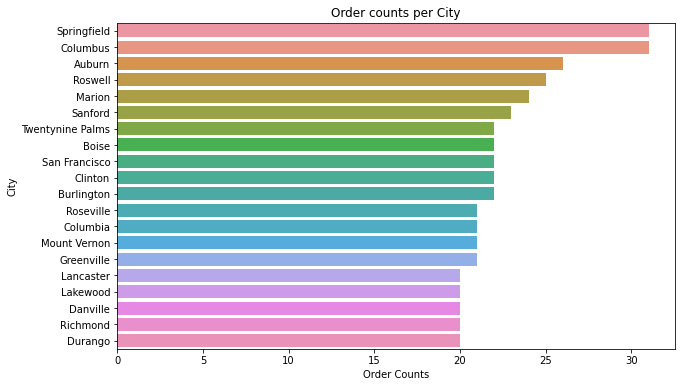

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_cities['City'], x=top_cities['Order ID'])
plt.xlabel('Order Counts')
plt.ylabel('City')
plt.title('Order counts per City')


### Products with top-20 profit margins

In [37]:
top_profit_margins = clean_df_walmart.groupby('Product Name')['Profit Margin'].sum().sort_values(ascending = False).head(20).to_frame().reset_index()

Text(0.5, 1.0, 'Top 20 highest profit margins')

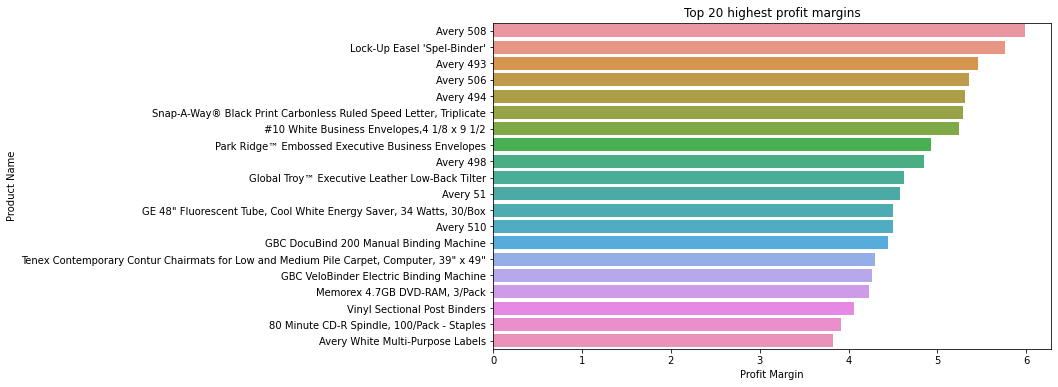

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_profit_margins['Product Name'], x=top_profit_margins['Profit Margin'])
plt.xlabel('Profit Margin')
plt.ylabel('Product Name')
plt.title('Top 20 highest profit margins')


### Customer age vs Sales, segmented by Region

<Figure size 720x432 with 0 Axes>

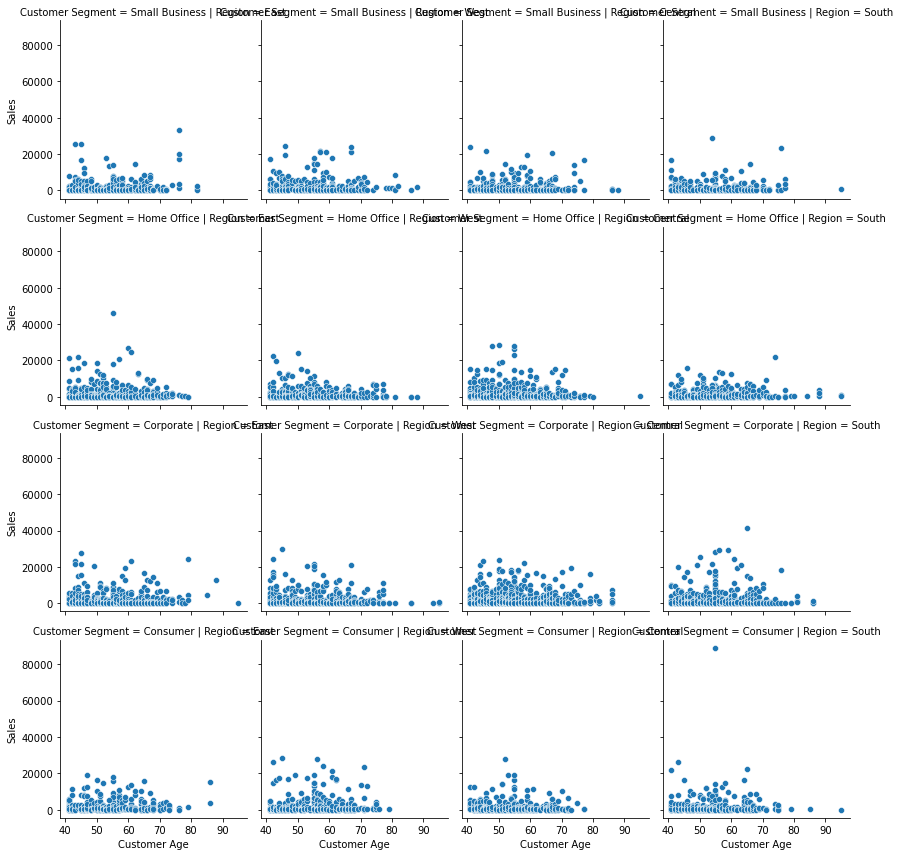

In [39]:
plt.figure(figsize=(10, 6))
fg = sns.FacetGrid(clean_df_walmart, col = 'Region', row = 'Customer Segment').map(sns.scatterplot, "Customer Age", "Sales")